# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """ Code Here
        建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
        
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
from keras.optimizers import SGD,RMSprop, Adagrad, Adam

In [17]:
## 超參數設定
""" Set your required experiment parameters
"""
LEARNING_RATE = [0.1, 0.01]
EPOCHS = 20
BATCH_SIZE = 256
OPT = ['SGD', 'RMSprop', 'Adagrad', 'Adam']

In [18]:
results = {}
""" 建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    for opt in OPT:

        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with lr = %.6f" % (lr))
        print("Experiment with opt = %s" % (opt))
        model = build_mlp(input_shape=x_train.shape[1:])
        
        if opt == 'SGD':
            optimizer = SGD(lr=lr)
        if opt == 'RMSprop':
            optimizer = RMSprop(lr=lr)
        if opt == 'Adagrad':
            optimizer = Adagrad(lr=lr)
        if opt == 'Adam':
            optimizer = Adam(lr=lr)

        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True,
                  verbose=0)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-lr-%s" % str(lr) + 'opt-%s'% str(opt)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with lr = 0.100000
Experiment with opt = SGD
Experiment with lr = 0.100000
Experiment with opt = RMSprop
Experiment with lr = 0.100000
Experiment with opt = Adagrad
Experiment with lr = 0.100000
Experiment with opt = Adam
Experiment with lr = 0.010000
Experiment with opt = SGD
Experiment with lr = 0.010000
Experiment with opt = RMSprop
Experiment with lr = 0.010000
Experiment with opt = Adagrad
Experiment with lr = 0.010000
Experiment with opt = Adam


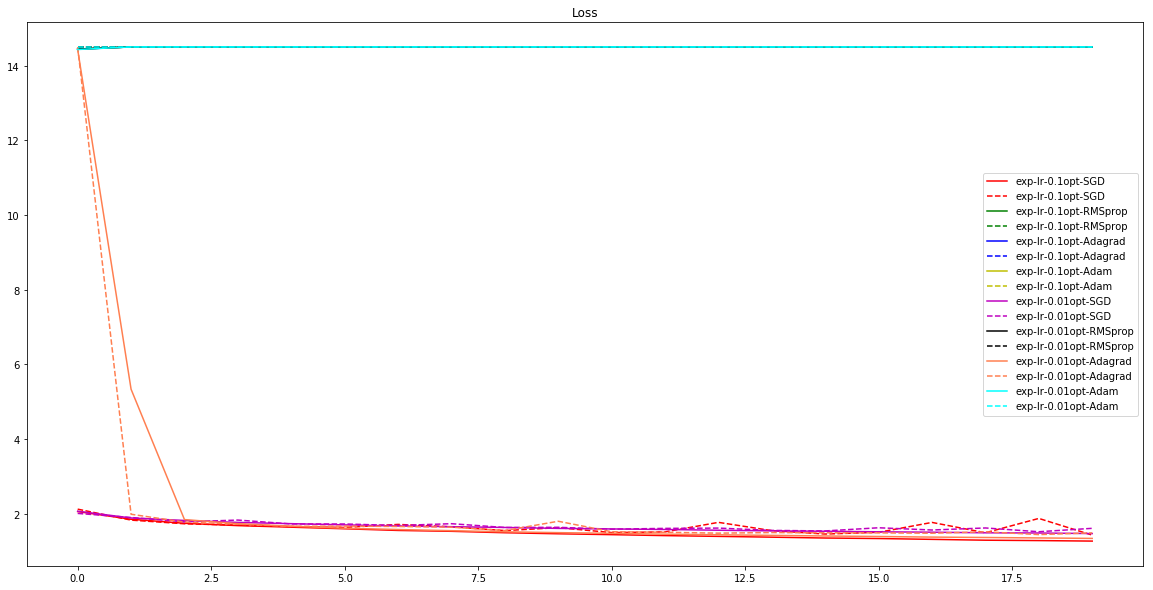

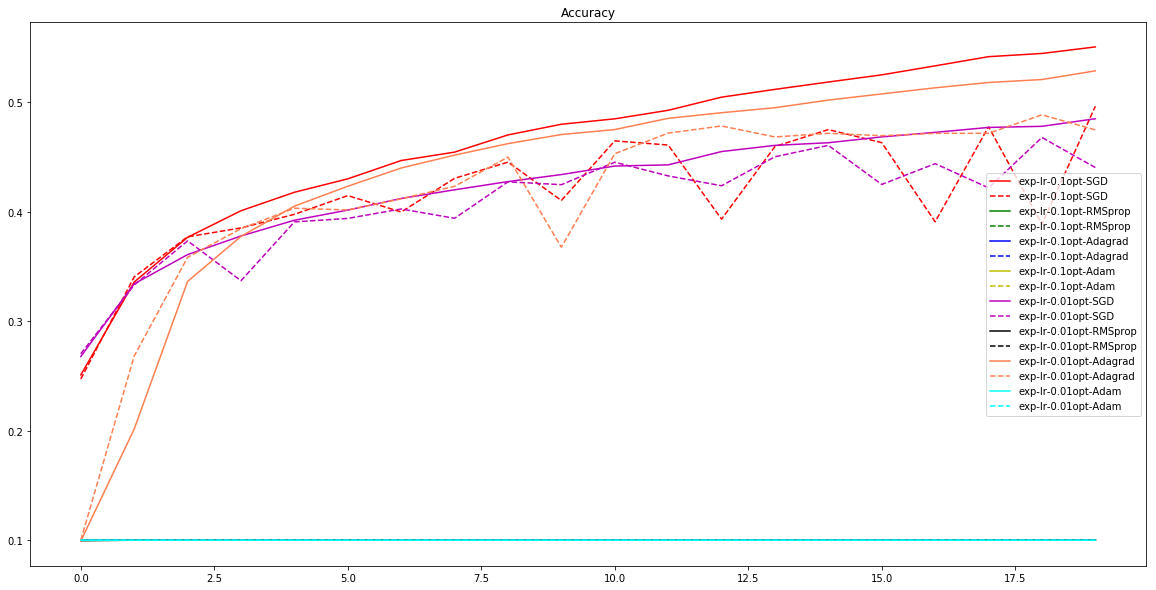

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

""" 將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
""" Code Here
    將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "coral", "aqua"]

plt.figure(figsize=(20, 10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(20, 10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()